# 240518-AIML-lecture Group Project

Created by: Chandni Kazi and Pramod Singh

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #imshow = 'image show'
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import models, layers
#for viz 
import matplotlib.pyplot as plt

## 1. Load the dataset (Churn_Modelling.csv)

In [8]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\Churn_Modelling.csv")

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## 2. Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)

In [10]:
keepcols = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']
df2 = df[keepcols]
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Prepare independent variables X and dependent variable Y (Exited).

In [11]:
x = df2.drop(columns='Exited')
y = df2["Exited"]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 4. OneHotEncode (get_dummies) the Geography and gender columns

In [13]:
x.value_counts("Gender")

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
x.value_counts("Geography")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [41]:
x2 = pd.get_dummies(x,columns=["Gender",'Geography'])
x2.head()
x2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

## 5. Perform a train test split in the ratio 80:20 and random_state=0

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=0)
print(x_test.shape)

(2000, 13)


## 6. Perform Feature scaling on X_train and X_text using MinMaxScaler

In [17]:
ml_scaler = MinMaxScaler()
x_train_scaled = ml_scaler.fit_transform(x_train)
x_test_scaled = ml_scaler.fit_transform(x_test)


## 7. Build a Keras Sequential model with the following layers (Hint: no need to flatten as we don't have a 2d image and the data is already tabluar)
- Dense layer with 6 neurons and activation relu
- Dense layer with 6 neurons and activation relu
- Dense layer with 1 neuron and activation sigmoid
- Compile the model with adam optimizer, binary_crossentropy loss and metric accuracy (use the text values instead of the functions e.g. 'binary_crossentropy')
- Train the model for 10 epochs and batch size 10

In [18]:
nn_model = models.Sequential(  #model building happens sequentially
    [layers.Dense(6,activation='relu'), #model with 1 hidden layer with 6 neurons 
    layers.Dense(6,activation='relu'), #model with 1 hidden layer with 6 neurons 
    layers.Dense(1,activation='sigmoid'), #model with 1 hidden layer with 6 neurons 
    ]
)   

In [19]:
nn_model.compile(optimizer = 'adam', #adam is the most used in the industry. This is another hyperparameter though as well 
                 #for the loss function, you can use 'sparse_categorical_crossentropy' to use default values. However, we need to customize it using a function (not a string) because we do not have an activation function in the output/last layer
                 loss = 'binary_crossentropy', #loss = 'sparse_categorical_crossentropy', #most common loss function. 
                 metrics=['accuracy'])

In [20]:
model_hist = nn_model.fit(x_train_scaled,
                          y_train,
                          epochs = 10, #controls the number of backpropagation cycles to perform
                          validation_split=0.2,
                          batch_size=10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.7909 - loss: 0.5367 - val_accuracy: 0.7962 - val_loss: 0.4726
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7964 - loss: 0.4648 - val_accuracy: 0.8012 - val_loss: 0.4630
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7933 - loss: 0.4643 - val_accuracy: 0.7994 - val_loss: 0.4537
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8008 - loss: 0.4499 - val_accuracy: 0.8106 - val_loss: 0.4427
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8179 - loss: 0.4241 - val_accuracy: 0.8087 - val_loss: 0.4385
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8205 - loss: 0.4168 - val_accuracy: 0.8087 - val_loss: 0.4420
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8170 - loss: 0.4265 - val_accuracy: 0.8125 - val_loss: 0.4361
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8160 - loss: 0.4203 - 

## 8. Build the evaluation charts between train and val datasets

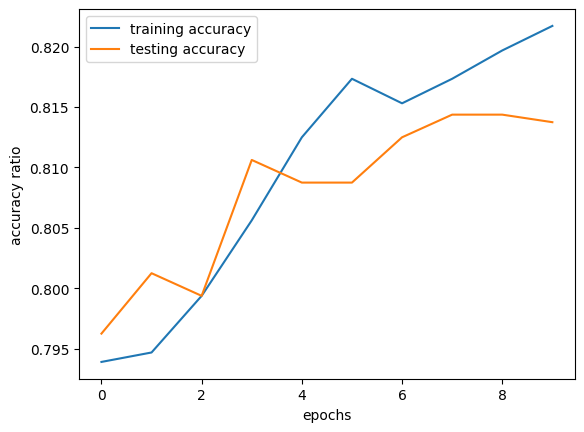

In [21]:
history_data = model_hist.history
plt.plot(history_data['accuracy'],label="training accuracy")
plt.plot(history_data['val_accuracy'],label="testing accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy ratio')
plt.legend()

## 9. Evaluate the model on the test set; print the accuracy  (bonus: build a confusion matrix)

In [22]:
nn_model.evaluate(x_test_scaled,y_test,verbose=2) #much better at image detection 

63/63 - 0s - 3ms/step - accuracy: 0.8205 - loss: 0.4180


[0.41796159744262695, 0.8205000162124634]

In [23]:
#get predicted value
y_pred = nn_model.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step


array([[0.16192898],
       [0.30165505],
       [0.09071246],
       ...,
       [0.18185964],
       [0.12348325],
       [0.17420089]], dtype=float32)

In [24]:
y_pred2 = (y_pred>0.5)
y_pred2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [25]:
cm = confusion_matrix(y_test, y_pred2) 
cm

array([[1569,   26],
       [ 333,   72]], dtype=int64)

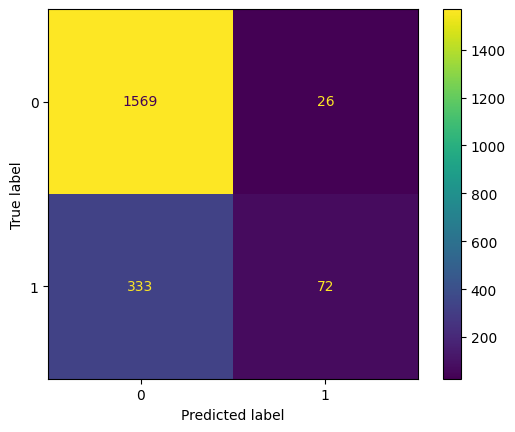

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Task B

Use the built ANN model to predict if the customer with the following information will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

So, should we let the customer go? (edited) 

In [27]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [42]:

x2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [73]:
Geography_France = 1
Geography_Germany = 0 
Geography_Spain = 0 
CreditScore = 600
Gender_Male = 1
Gender_Female = 0
Age = 40
Tenure = 3
Balance = 60000
NumOfProducts = 2
HasCrCard = 1
IsActiveMember = 1
EstimatedSalary = 500000

In [74]:
input_vector = np.array([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain]])
input_vector

array([[   600,     40,      3,  60000,      2,      1,      1, 500000,
             0,      1,      1,      0,      0]])

In [75]:
y_pred_person = nn_model.predict(input_vector)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [76]:
y_pred_person2 = (y_pred_person>0.5)
y_pred_person2

array([[False]])

Based on the model, the customer will NOT close his account.  